In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import math
rnd.seed(20161112)

In [171]:
class FirmExports:
    def __init__(self, exportYears = 20, exportProb = 0.25):
        self.years = exportYears
        self.prob = exportProb
        self.yearsCalendar = []
        self.yearsPseudo = []
        self.calendarGrowth = []
        self.pseudoGrowth = []
        
    def firmGrowth(self):

        self.start = int(rnd.uniform(high = 11)) + 1 # first month shouldn't be January, number 1 to 11
        exportLast = 1

        exportMonths = [0] * (self.years * 12)

        zeroCounter = self.start
        for t in range(self.years * 12 - self.start):
            if rnd.uniform() <= self.prob:
                exportLast *= (1. + rnd.uniform(low = -0.1, high = 0.101))
                exportMonths[self.start + t] = exportLast
                zeroCounter = 0
            else:
                if zeroCounter == 11:
                    exportMonths[self.start + t] = exportLast
                    zeroCounter = 0
                else:
                    zeroCounter += 1

        self.yearsCalendar = []
        self.yearsPseudo = []
        for t in range(self.years -1):
            self.yearsCalendar.append(sum(exportMonths[t * 12 : t * 12 + 12]))
            self.yearsPseudo.append(sum(exportMonths[t * 12 + self.start : t * 12 + self.start + 12]))

        self.calendarGrowth = []
        self.pseudoGrowth = []
        for t in range(self.years - 2):
            try:
                self.calendarGrowth.append(self.yearsCalendar[t + 1] / self.yearsCalendar[t])
                self.pseudoGrowth.append(self.yearsPseudo[t + 1] / self.yearsPseudo[t])
            except ZeroDivisionError:
                print(t)
                print(self.yearsCalendar[t + 1])
                print(self.yearsCalendar[t])
                print(self.yearsPseudo[t + 1])
                print(self.yearsPseudo[t])


In [208]:
class CountryExports:
    def __init__(self, countryFirms = 10, exportYears = 20, exportProb = 0.25):
        self.firms = countryFirms
        self.years = exportYears
        self.prob = exportProb
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth =np.zeros(self.years - 2)

    def countryGrowth(self):
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth = np.zeros(self.years - 2)
        for f in range(self.firms):
            firm = FirmExports(exportYears = self.years, exportProb = self.prob)
            firm.firmGrowth()
            self.calendarGrowth += np.array(firm.calendarGrowth) 
            self.pseudoGrowth += np.array(firm.pseudoGrowth)
        self.calendarGrowth = self.calendarGrowth / self.firms - 1
        self.pseudoGrowth = self.pseudoGrowth / self.firms - 1
        
    def countryCumul(self, fromYear = 0):
        self.fromYear = fromYear
        self.calendarCumul = np.prod(self.calendarGrowth[self.fromYear:] + 1) ** (1 / (self.years - 2 - self.fromYear))
        self.pseudoCumul = np.prod(self.pseudoGrowth[self.fromYear:] + 1) ** (1 / (self.years - 2 - self.fromYear))

            

In [209]:
class Simulations:
    def __init__(self, simulations = 100, countryFirms = 10, exportYears = 20, exportProb = 0.25):
        self.simulations = simulations
        self.firms = countryFirms
        self.years = exportYears
        self.prob = exportProb
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth =np.zeros(self.years - 2)
        
    def simulationGrowth(self):
        self.calendarGrowth = np.zeros(self.years - 2)
        self.pseudoGrowth = np.zeros(self.years - 2)
        for s in range(self.simulations):
            country = CountryExports(countryFirms = self.firms, exportYears = self.years, exportProb = self.prob)
            country.countryGrowth()
            self.calendarGrowth += country.calendarGrowth 
            self.pseudoGrowth += country.pseudoGrowth
        self.calendarGrowth = self.calendarGrowth / self.simulations - 1
        self.pseudoGrowth = self.pseudoGrowth / self.simulations - 1
        
    def simulationCumul(self, fromYear = 0):
        self.fromYear = fromYear
        self.calendarCumul = np.prod(self.calendarGrowth[self.fromYear:] + 1) ** (1 / (self.years - 2 - self.fromYear))
        self.pseudoCumul = np.prod(self.pseudoGrowth[self.fromYear:] + 1) ** (1 / (self.years - 2 - self.fromYear))


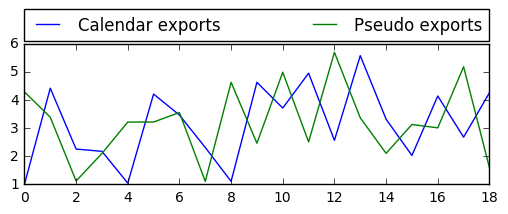

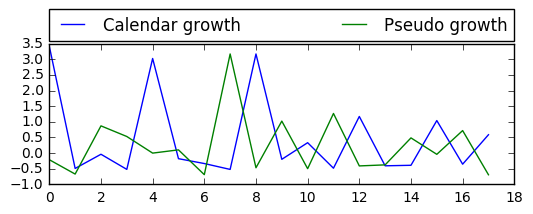

In [98]:
firm = FirmExports(exportYears = 20, exportProb = 0.25)
firm.firmGrowth()

plt.subplot(2,1,1)
calendar = plt.plot(range(firm.years - 1), firm.yearsCalendar, label = 'Calendar exports')
pseudo = plt.plot(range(firm.years - 1), firm.yearsPseudo, label = 'Pseudo exports')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

plt.subplot(2,1,2)
calendar = plt.plot(range(firm.years - 2), firm.calendarGrowth, label = 'Calendar growth')
pseudo = plt.plot(range(firm.years - 2), firm.pseudoGrowth, label = 'Pseudo growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

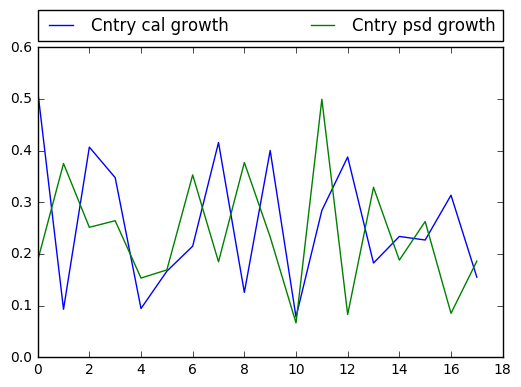

In [210]:
country = CountryExports(countryFirms = 100, exportYears = 20, exportProb = 0.1)
country.countryGrowth()
calendar = plt.plot(range(country.years - 2), country.calendarGrowth, label = 'Cntry cal growth')
pseudo = plt.plot(range(country.years - 2), country.pseudoGrowth, label = 'Cntry psd growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [214]:
country.countryCumul(fromYear = 0)
print('Country calendar cumulative growth from year ' + str(country.fromYear) + ': ' 
      + str(np.round((country.calendarCumul -1) * 100, 2)) + '%')
print('Country pseudo growth from year ' + str(country.fromYear) + ': ' 
      + str(np.round((country.pseudoCumul - 1) * 100, 2)) + '%')

Country calendar cumulative growth from year 0: 25.18%
Country pseudo growth from year 0: 23.13%


In [215]:
country.countryCumul(fromYear = 14)
print('Country calendar cumulative growth from year ' + str(country.fromYear) + ': ' 
      + str(np.round((country.calendarCumul - 1) * 100, 2)) + '%')
print('Country pseudo  growth from year ' + str(country.fromYear) + ': ' 
      + str(np.round((country.pseudoCumul - 1) * 100, 2)) + '%')

Country calendar cumulative growth from year 14: 23.14%
Country pseudo  growth from year 14: 17.91%


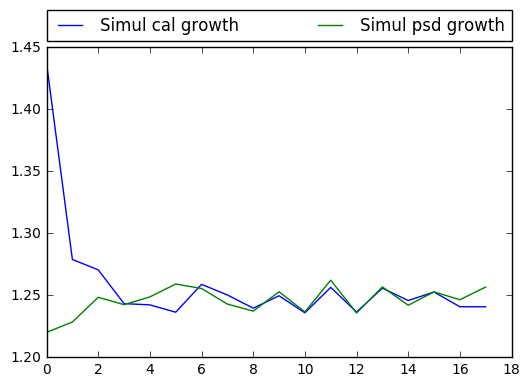

In [196]:
simulation = Simulations(simulations = 100, countryFirms = 100, exportYears = 20, exportProb = 0.1)
simulation.simulationGrowth()
      
calendar = plt.plot(range(simulation.years - 2), simulation.calendarGrowth, label = 'Simul cal growth')
pseudo = plt.plot(range(simulation.years - 2), simulation.pseudoGrowth, label = 'Simul psd growth')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [206]:
simulation.simulationCumul(fromYear = 0)
print('Calendar cumulative growth from year ' + str(simulation.fromYear) + ': ' 
      + str(np.round((simulation.calendarCumul -1) * 100, 2)) + '%')
print('Pseudo cumulative growth from year ' + str(simulation.fromYear) + ': ' 
      + str(np.round((simulation.pseudoCumul -1) * 100, 2)) + '%')

Calendar cumulative growth from year 0: 25.89%
Pseudo cumulative growth from year 0: 24.59%


In [207]:
simulation.simulationCumul(fromYear = 4)
print('Calendar cumulative growth from year ' + str(simulation.fromYear) + ': ' 
      + str(np.round((simulation.calendarCumul -1) * 100, 2)) + '%')
print('Calendar cumulative growth from year ' + str(simulation.fromYear) + ': ' 
      + str(np.round((simulation.pseudoCumul -1) * 100, 2)) + '%')

Calendar cumulative growth from year 4: 24.59%
Calendar cumulative growth from year 4: 24.9%
